# Process

Please refer to [Case Study: How does a Bike-Share Navigate Speedy Success?](https://www.linkedin.com/pulse/case-study-how-does-bike-share-navigate-speedy-success-richard-leung) for the remaining analysis steps **ask**, **prepare**, **process**, **share** and **act**.


In [1]:
library(tidyverse)
library(dplyr)
library(lubridate)
library(scales)

options(scipen=999)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In [2]:
processed_tripdata_file_path <- "/Users/richardleung/Desktop/Google_DA_Cert/Capstone_project/Case_Study_01/data/processed_data/"
processed_tripdate_file_name <- "202011-202110-divvy-tripdata-processed.csv"

processed_tripdata <- read_csv(file = paste(processed_tripdata_file_path, processed_tripdate_file_name, sep=''))

str(processed_tripdata)

Parsed with column specification:
cols(
  started_at = col_character(),
  ended_at = col_character(),
  bike_type = col_character(),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	4492727 obs. of  12 variables:
 $ started_at        : chr  "2021-02-02 16:06:09 UTC" "2021-02-14 14:19:39 UTC" "2021-02-27 15:42:31 UTC" "2021-02-28 16:23:20 UTC" ...
 $ ended_at          : chr  "2021-02-02 16:24:11 UTC" "2021-02-14 14:49:09 UTC" "2021-02-27 15:52:53 UTC" "2021-02-28 16:34:15 UTC" ...
 $ bike_type         : chr  "classic" "classic" "classic" "classic" ...
 $ start_station_name: chr  "Damen Ave & Melrose Ave" "Ashland Ave & Division St" "Leavitt St & Addison St" "Oakley Ave & Irving Park Rd" ...
 $ start_station_id  : chr  "13143" "13061" "KA1504000143" "KA1504000158" ...
 $ end_station_name  : chr  "Western Ave & Leland Ave" "Western Ave & Leland Ave" "Western Ave & Leland Ave" "Western Ave & Leland Ave" ...
 $ end_station_id    : chr  "TA1307000140" "TA1307000140" "TA1307000140" "TA1307000140" ...
 $ start_lat         : num  41.9 41.9 41.9 42 42 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 

In [3]:
processed_tripdata$started_at <- ymd_hms(processed_tripdata$started_at)
processed_tripdata$ended_at <- ymd_hms(processed_tripdata$ended_at)
processed_tripdata$duration <- as.numeric(difftime(processed_tripdata$ended_at, processed_tripdata$started_at, units="min"))
processed_tripdata$month <- format(processed_tripdata$started_at, format="%B")
processed_tripdata$day_of_week <- format(processed_tripdata$started_at, format="%A")
processed_tripdata$hour <- format(processed_tripdata$started_at, format="%H")

glimpse(processed_tripdata)

Observations: 4,492,727
Variables: 16
$ started_at         <dttm> 2021-02-02 16:06:09, 2021-02-14 14:19:39, 2021-02…
$ ended_at           <dttm> 2021-02-02 16:24:11, 2021-02-14 14:49:09, 2021-02…
$ bike_type          <chr> "classic", "classic", "classic", "classic", "class…
$ start_station_name <chr> "Damen Ave & Melrose Ave", "Ashland Ave & Division…
$ start_station_id   <chr> "13143", "13061", "KA1504000143", "KA1504000158", …
$ end_station_name   <chr> "Western Ave & Leland Ave", "Western Ave & Leland …
$ end_station_id     <chr> "TA1307000140", "TA1307000140", "TA1307000140", "T…
$ start_lat          <dbl> 41.94060, 41.90345, 41.94665, 41.95434, 41.96590, …
$ start_lng          <dbl> -87.67850, -87.66775, -87.68336, -87.68608, -87.69…
$ end_lat            <dbl> 41.96649, 41.96649, 41.96649, 41.96649, 41.96649, …
$ end_lng            <dbl> -87.68842, -87.68842, -87.68842, -87.68842, -87.68…
$ member_casual      <chr> "member", "member", "member", "member", "member", …
$ duration    

In [4]:
processed_tripdata %>%
  filter(duration <= 0) %>%
  count()

n
1404


In [5]:
processed_tripdata <- processed_tripdata %>%
    filter(duration > 0)

glimpse(processed_tripdata)

head(processed_tripdata)

Observations: 4,491,323
Variables: 16
$ started_at         <dttm> 2021-02-02 16:06:09, 2021-02-14 14:19:39, 2021-02…
$ ended_at           <dttm> 2021-02-02 16:24:11, 2021-02-14 14:49:09, 2021-02…
$ bike_type          <chr> "classic", "classic", "classic", "classic", "class…
$ start_station_name <chr> "Damen Ave & Melrose Ave", "Ashland Ave & Division…
$ start_station_id   <chr> "13143", "13061", "KA1504000143", "KA1504000158", …
$ end_station_name   <chr> "Western Ave & Leland Ave", "Western Ave & Leland …
$ end_station_id     <chr> "TA1307000140", "TA1307000140", "TA1307000140", "T…
$ start_lat          <dbl> 41.94060, 41.90345, 41.94665, 41.95434, 41.96590, …
$ start_lng          <dbl> -87.67850, -87.66775, -87.68336, -87.68608, -87.69…
$ end_lat            <dbl> 41.96649, 41.96649, 41.96649, 41.96649, 41.96649, …
$ end_lng            <dbl> -87.68842, -87.68842, -87.68842, -87.68842, -87.68…
$ member_casual      <chr> "member", "member", "member", "member", "member", …
$ duration    

started_at,ended_at,bike_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,month,day_of_week,hour
2021-02-02 16:06:09,2021-02-02 16:24:11,classic,Damen Ave & Melrose Ave,13143,Western Ave & Leland Ave,TA1307000140,41.94060,-87.67850,41.96649,-87.68842,member,18.033333,February,Tuesday,16
2021-02-14 14:19:39,2021-02-14 14:49:09,classic,Ashland Ave & Division St,13061,Western Ave & Leland Ave,TA1307000140,41.90345,-87.66775,41.96649,-87.68842,member,29.500000,February,Sunday,14
2021-02-27 15:42:31,2021-02-27 15:52:53,classic,Leavitt St & Addison St,KA1504000143,Western Ave & Leland Ave,TA1307000140,41.94665,-87.68336,41.96649,-87.68842,member,10.366667,February,Saturday,15
2021-02-28 16:23:20,2021-02-28 16:34:15,classic,Oakley Ave & Irving Park Rd,KA1504000158,Western Ave & Leland Ave,TA1307000140,41.95434,-87.68608,41.96649,-87.68842,member,10.916667,February,Sunday,16
2021-02-28 10:56:27,2021-02-28 11:02:07,classic,Rockwell St & Eastwood Ave,KA1504000093,Western Ave & Leland Ave,TA1307000140,41.96590,-87.69364,41.96649,-87.68842,member,5.666667,February,Sunday,10
2021-02-11 11:15:52,2021-02-11 11:30:02,classic,Broadway & Argyle St,13108,Western Ave & Leland Ave,TA1307000140,41.97382,-87.65966,41.96649,-87.68842,member,14.166667,February,Thursday,11


# Analyze

Warning message:
“Removed 83576 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4 rows containing missing values (geom_bar).”

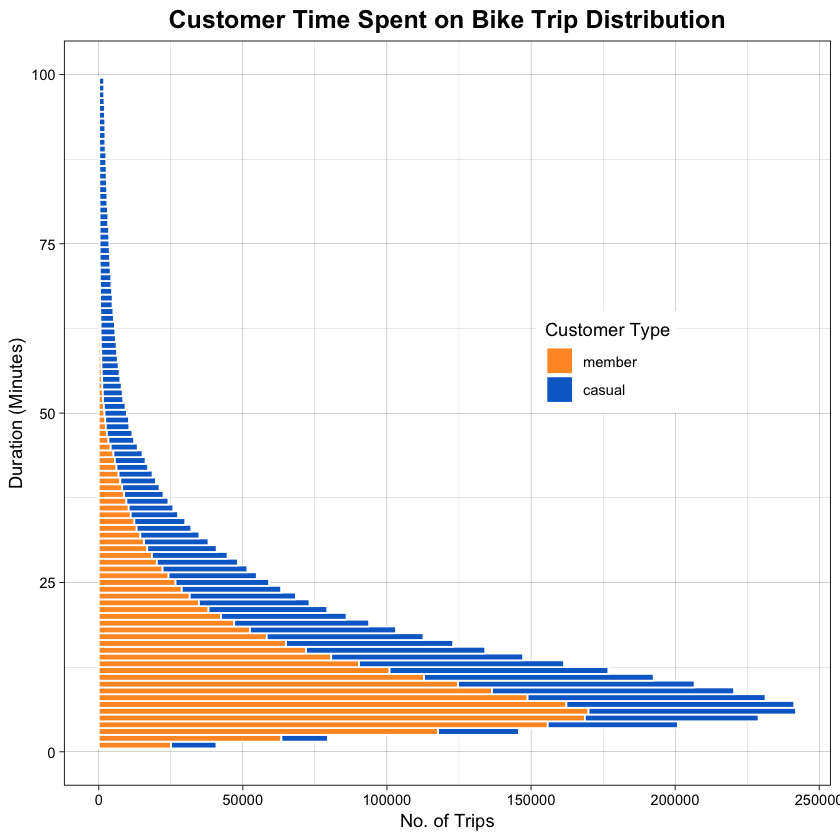

In [6]:
ggplot(processed_tripdata, aes(x=duration, fill=member_casual)) +
    geom_histogram(binwidth = 1, color="white") +
    xlim(0, 100) +
    xlab("Duration (Minutes)") +
    ylab("No. of Trips") +
    theme_linedraw() +
    ggtitle("Customer Time Spent on Bike Trip Distribution") +
    theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
            legend.justification = c(1,0),
            legend.position = c(0.8,0.5)
         ) +
    guides(fill=guide_legend(title="Customer Type")) +
    scale_fill_manual(values=c('#FF992D','#066CCD'), limits = c("member", "casual")) +
    coord_flip()

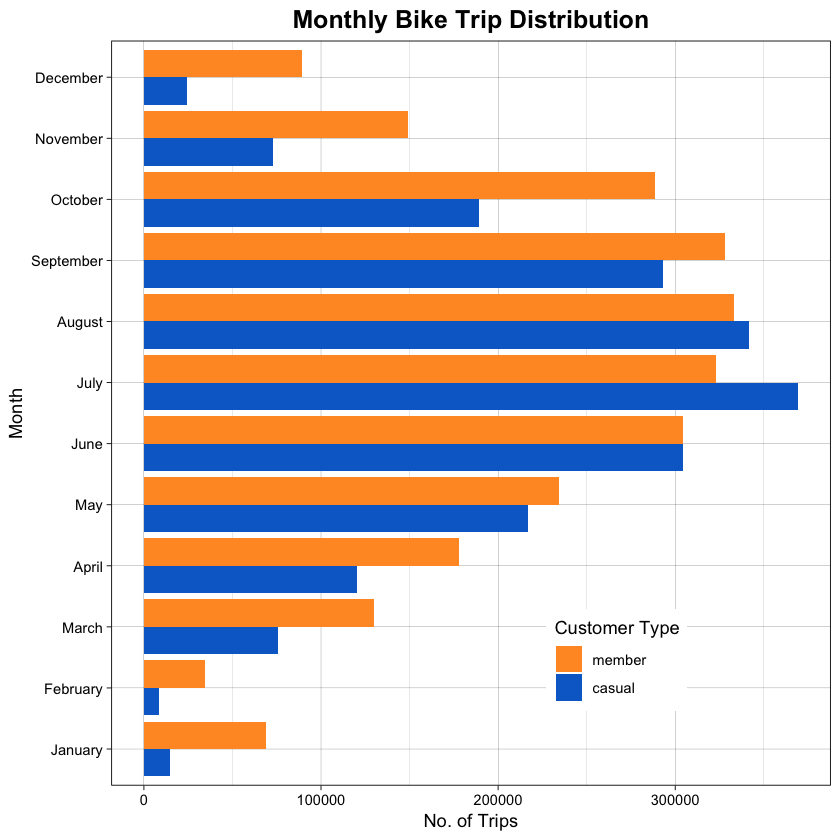

In [7]:
processed_tripdata %>%
    select(month, member_casual) %>%
    group_by(month, member_casual) %>%
    count() %>%
    ggplot(aes(x=factor(month, level=c('January', 'February', 'March', 'April', 'May', 
                                         'June', 'July', 'August', 'September', 'October', 'November', 'December')), 
                        y=n, fill=member_casual)) +
        geom_bar(stat="identity", position=position_dodge())+
        coord_flip()+
        scale_fill_manual(values=c('#FF992D','#066CCD'), limits = c("member", "casual")) +
        xlab("Month") +
        ylab("No. of Trips") +
        theme_linedraw() +
        ggtitle("Monthly Bike Trip Distribution") +
        guides(fill=guide_legend(title="Customer Type")) +
        theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
                legend.justification = c(1,0),
                legend.position = c(0.8,0.1)
             )

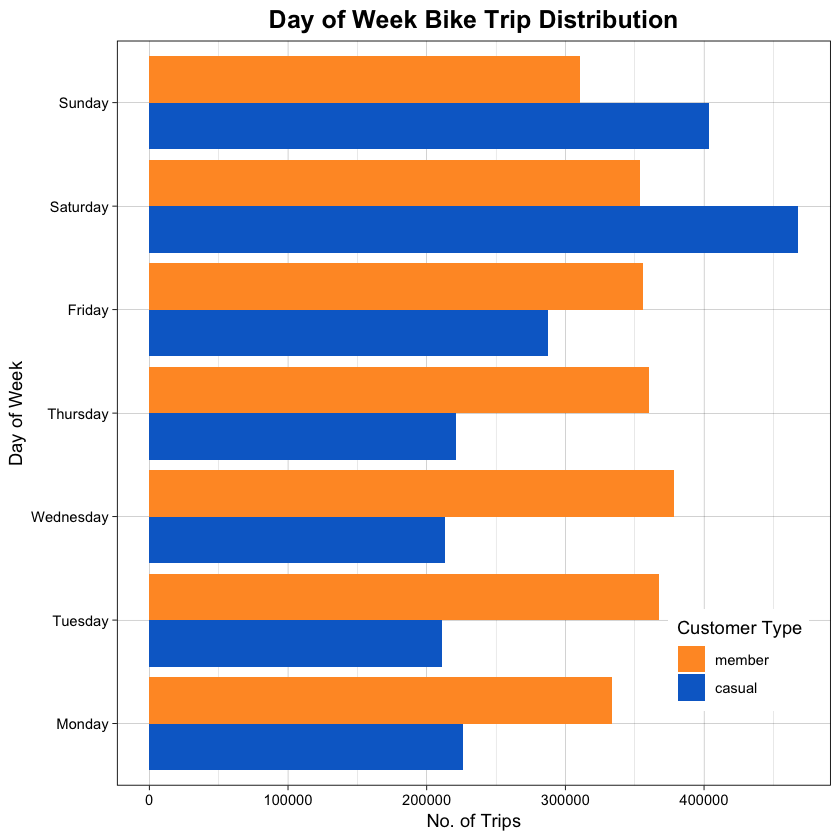

In [8]:
processed_tripdata %>%
    select(day_of_week, member_casual) %>%
    group_by(day_of_week, member_casual) %>%
    count() %>% 
    ggplot(aes(x=factor(day_of_week, level=c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                               'Friday', 'Saturday', 'Sunday')), 
               y=n, fill=member_casual)) +
        geom_bar(stat="identity", position=position_dodge())+
        coord_flip()+
        scale_fill_manual(values=c('#FF992D','#066CCD'), limits = c("member", "casual")) +
        xlab("Day of Week") +
        ylab("No. of Trips") +
        theme_linedraw() +
        ggtitle("Day of Week Bike Trip Distribution") +
        guides(fill=guide_legend(title="Customer Type")) +
        theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
                legend.justification = c(1,0),
                legend.position = c(0.97,0.1)
             )

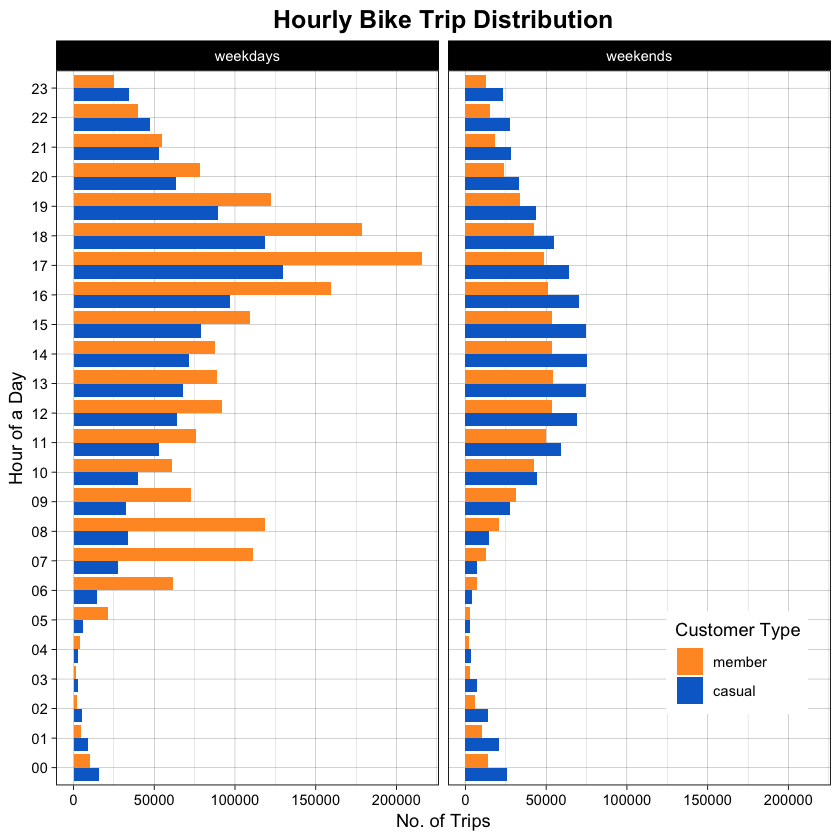

In [9]:
df <- processed_tripdata %>%
    select(day_of_week, hour, member_casual) %>%
    filter(day_of_week == 'Saturday' | day_of_week == 'Sunday') %>%
    group_by(hour, member_casual) %>%
    count()
df$weekend_weekday = 'weekends'

df1 <- processed_tripdata %>%
    select(day_of_week, hour, member_casual) %>%
    filter(day_of_week != 'Saturday' & day_of_week != 'Sunday') %>%
    group_by(hour, member_casual) %>%
    count()

df1$weekend_weekday = 'weekdays'

df <- rbind(df, df1)

df %>%
    ggplot(aes(x=hour, y=n, fill=member_casual)) +
        geom_bar(stat="identity", position=position_dodge())+
        coord_flip()+
        scale_fill_manual(values=c('#FF992D','#066CCD'), limits = c("member", "casual")) +
        xlab("Hour of a Day") +
        ylab("No. of Trips") +
        theme_linedraw() +
        ggtitle("Hourly Bike Trip Distribution") +
        guides(fill=guide_legend(title="Customer Type")) +
        theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
                legend.justification = c(1,0),
                legend.position = c(0.97,0.1)
             ) +
        facet_wrap(~weekend_weekday)

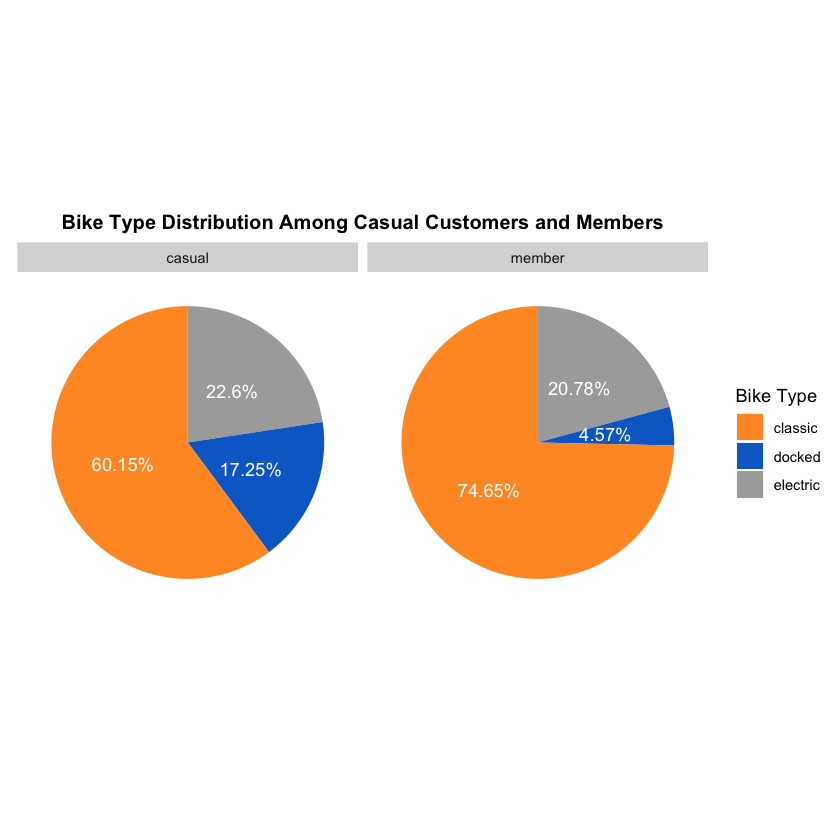

In [10]:
df <- processed_tripdata %>%
    select(member_casual, bike_type) %>%
    filter(member_casual == "casual") %>%
    group_by(bike_type, member_casual) %>%
    count()

df1 <- processed_tripdata %>%
    select(member_casual, bike_type) %>%
    filter(member_casual == "member") %>%
    group_by(bike_type, member_casual) %>%
    count() 

df2 <- rbind((df%>%mutate(countT= sum(df$n)) %>%
              group_by(bike_type, add=TRUE) %>%
              mutate(per=n/countT, per_label=paste0(round(100*n/countT,2),"%"))), 
             (df1%>%mutate(countT= sum(df1$n)) %>%
              group_by(bike_type, add=TRUE) %>%
              mutate(per=n/countT, per_label=paste0(round(100*n/countT,2),"%"))))

ggplot(df2, aes(x="", y=per, fill=bike_type)) +
        geom_col() +
        coord_polar(theta = "y") +
        scale_y_continuous(labels = scales::percent) +
        geom_text(aes(label = per_label), position = position_stack(vjust = 0.5), color="white") +
        scale_fill_manual(values=c('#FF992D','#066CCD','#AAAAAA'), limits = c("classic", "docked", "electric")) +
        theme(axis.ticks = element_blank(),
            axis.title = element_blank(),
            axis.text = element_text(size = 0), 
            panel.background = element_rect(fill = "white"),
            plot.title = element_text(size = 12, face = "bold", hjust = 0.5)) +
        ggtitle("Bike Type Distribution Among Casual Customers and Members") +
        guides(fill=guide_legend(title="Bike Type")) +
        facet_wrap(~member_casual)

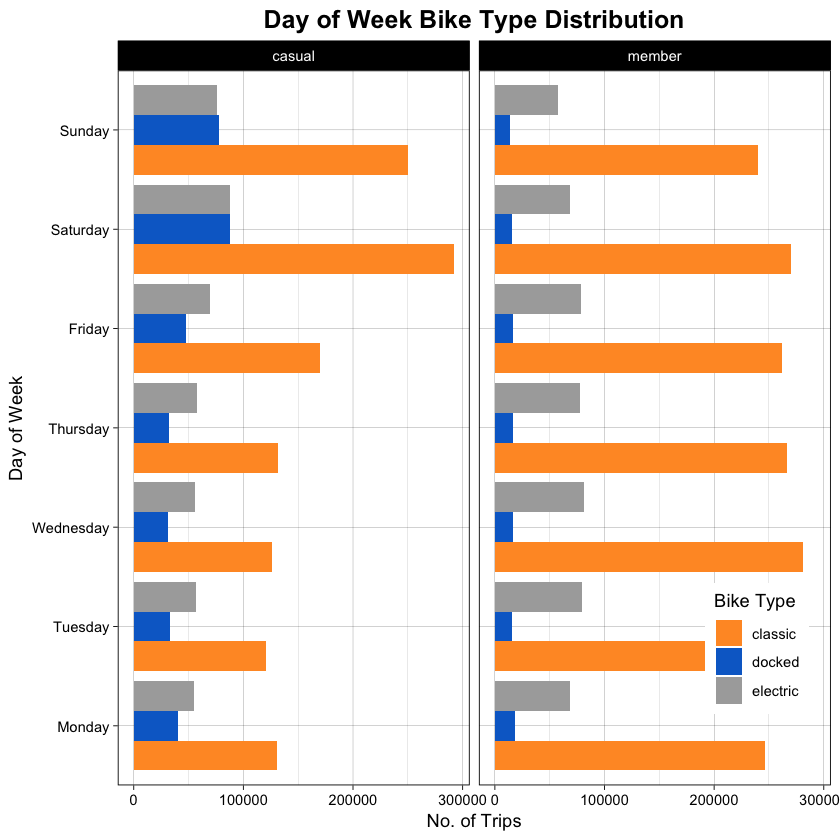

In [11]:
processed_tripdata %>%
    select(day_of_week, bike_type, member_casual) %>%
    group_by(day_of_week, bike_type, member_casual) %>%
    count() %>% 
    ggplot(aes(x=factor(day_of_week, level=c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                               'Friday', 'Saturday', 'Sunday')), 
               y=n, fill=bike_type)) +
        geom_bar(stat="identity", position=position_dodge())+
        coord_flip()+
        scale_fill_manual(values=c('#FF992D','#066CCD','#AAAAAA'), limits = c("classic","docked","electric")) +
        xlab("Day of Week") +
        ylab("No. of Trips") +
        theme_linedraw() +
        ggtitle("Day of Week Bike Type Distribution") +
        guides(fill=guide_legend(title="Bike Type")) +
        theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
                legend.justification = c(1,0),
                legend.position = c(0.97,0.1)
             ) +
        facet_wrap(~member_casual)

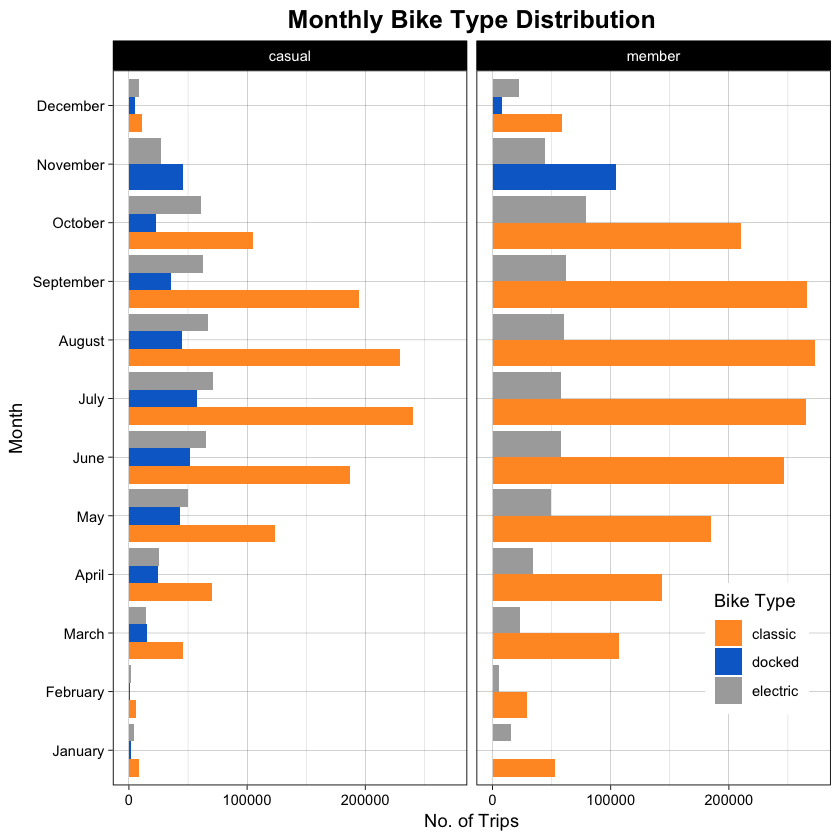

In [12]:
processed_tripdata %>%
    select(month, bike_type, member_casual) %>%
    group_by(month, bike_type, member_casual) %>%
    count() %>% 
    ggplot(aes(x=factor(month, level=c('January', 'February', 'March', 'April', 'May', 
                                         'June', 'July', 'August', 'September', 'October', 'November', 'December')), 
               y=n, fill=bike_type)) +
        geom_bar(stat="identity", position=position_dodge())+
        coord_flip()+
        scale_fill_manual(values=c('#FF992D','#066CCD','#AAAAAA'), limits = c("classic", "docked", "electric")) +
        xlab("Month") +
        ylab("No. of Trips") +
        theme_linedraw() +
        ggtitle("Monthly Bike Type Distribution") +
        guides(fill=guide_legend(title="Bike Type")) +
        theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
                legend.justification = c(1,0),
                legend.position = c(0.97,0.1)
             ) +
        facet_wrap(~member_casual)